# Verification of mortality effects

- Parameter variation `VerificationEFfects` in Anylogic
- 90 replicates per iteration or scenario

In [1]:
library(data.table)
library(xtable)
library(survival)
library(texreg)
library(fmsb)
library(metafor)
library(ggplot2)
library(simPH)
source("../src/utils.R")

Version:  1.37.5
Date:     2020-06-17
Author:   Philip Leifeld (University of Essex)

Consider submitting praise using the praise or praise_interactive functions.
Please cite the JSS article in your publications -- see citation("texreg").

Warning message:
"package 'fmsb' was built under R version 4.1.2"
Warning message:
"package 'metafor' was built under R version 4.1.1"
Loading required package: Matrix


Loading the 'metafor' package (version 3.0-2). For an
introduction to the package please type: help(metafor)


Warning message:
"package 'simPH' was built under R version 4.1.2"


In [2]:
# life table verification LE using mortality rates reported by CDC
mx = c(567.0,24.3 ,11.6 ,15.5 ,51.5 ,51.5 ,95.6 ,121.0 ,145.4 ,173.8 ,218.4,
    313.2 ,488.0 ,736.5 ,1050.2 ,1473.5 ,2206.9 ,3517.8 ,5871.7,13573.6)
mx = mx / 100000
le = lifetable(mx, ns = c(1, 4, rep(5, 2), 3, 2, rep(5, 14)))
le[1, "ex"]

[1] 79.02566

In [3]:
# read data files
m = fread("../output/data/mortality-testing-replicates.csv")
p = fread("../output/data/parameters-testing-replicates.csv")
e = fread("../output/data/environment-testing-replicates.csv")


In [4]:
sp = varyingParameters(p, "model_date")
parameters = names(sp)[!names(sp) %in% c("iteration", "replicate")]
print(parameters)

character(0)


In [110]:
# redefine iteration and replicate indexes
# sp[, niteration := .GRP, by = parameters]
# sp[, nreplicate := 1:.N, by = niteration]
# np = sp[, c("iteration", "replicate", "niteration", "nreplicate", parameters), with = FALSE]
# m = merge(m, np, by = c("iteration", "replicate"))
# summary(np[niteration == 3, nreplicate])
# unique(np[, c("niteration", parameters), with = FALSE])

# Exposure upward income mobility -> Mortality risk = 0.0, exposure until 18 years old

To explore correlation of the data produced by the ABM: 

- `total_rank_slope_exposure` and `rank_slope_exposure18`: exposure measures of place's rank-rank slopes (relative mobility)
- `income_group_mobility`: individual mobilityl, absolute value of (`income_group` - `parent_income_group`)
- `total_z_income_exposure`: exposure of standardized income

In [5]:
summary(e$nsi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07242 0.34705 0.36592 0.35332 0.37997 0.42401 

In [6]:
summary(e$gini)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.5217  0.2944  0.5294  0.5438 

In [7]:
e[gini==0]

iteration,replicate,model_time,gini,rank_slope,county_rank_slope_avg,rank_correlation,rank_absolute,income_mean,le,nsi,moves,moves_kid,last_generation,population
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,20,0,0.0000000,0.0000000,0.0000000,0.0000000,23083.43,0.00000,0.09408103,0.01923664,0.0000000,1,3275
1,1,40,0,0.0000000,0.0000000,0.0000000,0.0000000,25157.55,0.00000,0.17916403,0.78846883,0.3105323,2,7909
1,1,60,0,0.0000000,0.0000000,0.0000000,0.0000000,29484.59,0.00000,0.20463400,1.68239648,0.7281980,3,8646
1,1,80,0,0.0000000,0.0000000,0.0000000,0.0000000,30227.68,0.00000,0.35717067,3.13180761,1.6940399,4,8171
1,1,100,0,0.2997273,0.2625801,0.2997273,0.4251366,32168.59,0.00000,0.37643469,4.64460361,3.0395159,4,8098
1,1,120,0,0.3691146,0.3387870,0.3691146,0.4078194,42844.52,0.00000,0.39707472,7.89005017,6.9358278,5,4784
1,1,140,0,0.4701000,0.4472631,0.4700998,0.3825506,38303.94,0.00000,0.40659056,6.38855781,5.7817129,6,5873
1,1,160,0,0.4270820,0.3821100,0.4270820,0.3932864,35237.10,0.00000,0.35171577,4.33842847,3.8037975,7,8374
1,1,180,0,0.3948473,0.3333716,0.3948472,0.4013355,35301.26,77.52235,0.32841283,4.10090450,3.3434747,8,8513


In [129]:
summary(e[, model_time])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0   280.0   540.0   548.1   820.0  1100.0 

In [99]:
names(m)

[1] "iteration"                    "replicate"                   
 [3] "model_time"                   "id"                          
 [5] "fertility_control"            "parent_id"                   
 [7] "generation"                   "birthdate"                   
 [9] "age_death"                    "personal_trait"              
[11] "income"                       "parent_income"               
[13] "parent_children_coeff"        "county"                      
[15] "nkids"                        "nmoves"                      
[17] "nmoves_kid"                   "county_trait"                
[19] "county_mean_income"           "county_median_income"        
[21] "county_gini"                  "county_rank_correlation"     
[23] "county_rank_slope"            "county_rank_absolute"        
[25] "total_rank_slope_exposure"    "rank_slope_exposure18"       
[27] "total_rank_absolute_exposure" "rank_absolute_exposure18"    
[29] "total_rank_cor_exposure"      "rank_cor_exposure18"         
[31] "total_income_exposure"

In [9]:
t = copy(m)
t[, lincome := logIncome(income)]
t[, lcounty_income := logIncome(county_mean_income)]
t[, lparent_income := logIncome(parent_income)]
t[, ltotal_income_exposure := logIncome(total_income_exposure)]
t[, status := 1] # there is no censoring
# t[, individual_income_mobility := abs(income_group_mobility)]
# t = t[age_death > 18]
mean(t$age_death)

[1] 77.52003

In [10]:
cor(t[, .(rank_absolute_exposure18, rank_slope_exposure18, county_rank_slope, lincome, 
    county_mean_income, age_death, ltotal_income_exposure, personal_trait, county_trait)])

,rank_absolute_exposure18,rank_slope_exposure18,county_rank_slope,lincome,county_mean_income,age_death,ltotal_income_exposure,personal_trait,county_trait
rank_absolute_exposure18,1.00000000,-0.862120342,-0.1460483,0.13782324,0.13887143,0.066085416,0.40079813,0.001102170,-0.076647388
rank_slope_exposure18,-0.86212034,1.000000000,0.1551252,-0.14391299,-0.14633751,-0.070089680,-0.42380299,-0.001598036,0.081798753
county_rank_slope,-0.14604831,0.155125236,1.0000000,-0.51983666,-0.73097871,-0.225491377,-0.59073497,-0.437187722,0.304668112
lincome,0.13782324,-0.143912992,-0.5198367,1.00000000,0.66952290,0.389152025,0.64367832,0.846807108,-0.082782293
county_mean_income,0.13887143,-0.146337508,-0.7309787,0.66952290,1.00000000,0.307809015,0.75952432,0.569702418,-0.086946754
age_death,0.06608542,-0.070089680,-0.2254914,0.38915203,0.30780902,1.000000000,0.31641816,0.401319024,0.002342515
ltotal_income_exposure,0.40079813,-0.423802994,-0.5907350,0.64367832,0.75952432,0.316418156,1.00000000,0.476976337,-0.087550519
personal_trait,0.00110217,-0.001598036,-0.4371877,0.84680711,0.56970242,0.401319024,0.47697634,1.000000000,-0.065301460
county_trait,-0.07664739,0.081798753,0.3046681,-0.08278229,-0.08694675,0.002342515,-0.08755052,-0.065301460,1.000000000


In [132]:
cat(screenreg(list(lm(lincome ~ personal_trait + lparent_income, data = t))))


                Model 1     
----------------------------
(Intercept)         0.00    
                   (0.00)   
personal_trait      0.88 ***
                   (0.00)   
lparent_income      0.40 ***
                   (0.00)   
----------------------------
R^2                 0.88    
Adj. R^2            0.88    
Num. obs.       88186       
*** p < 0.001; ** p < 0.01; * p < 0.05


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



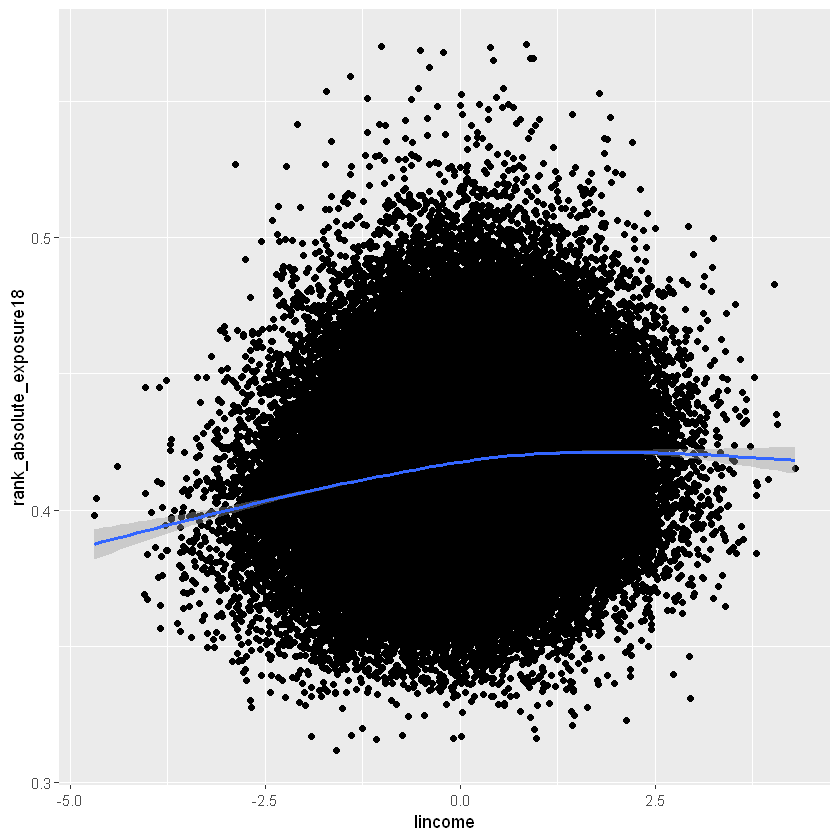

In [11]:
ggplot(t, aes(lincome, rank_absolute_exposure18)) + geom_point() + geom_smooth()

In [12]:
m1 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18, data =t)
m2 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18 + lincome, data = t)
m3 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18 +  lincome + lcounty_income, data = t)
m4 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18 + lincome + ltotal_income_exposure, data = t)
m5 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18 + lincome + ltotal_income_exposure + personal_trait, data = t)
m6 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18 + lincome + ltotal_income_exposure + county_trait, data = t)
m7 = coxph(Surv(age_death, status) ~ rank_absolute_exposure18 + lincome + ltotal_income_exposure + personal_trait + county_trait, data = t)
cat(screenreg(list(m1, m2, m3, m4, m5, m6, m7)))


                          Model 1         Model 2         Model 3         Model 4         Model 5         Model 6         Model 7       
----------------------------------------------------------------------------------------------------------------------------------------
rank_absolute_exposure18       -2.09 ***        0.23            0.34 **         1.44 ***       -0.01            1.36 ***       -0.10    
                               (0.12)          (0.12)          (0.12)          (0.13)          (0.13)          (0.13)          (0.13)   
lincome                                        -0.56 ***       -0.51 ***       -0.48 ***       -0.15 ***       -0.49 ***       -0.16 ***
                                               (0.00)          (0.00)          (0.00)          (0.01)          (0.00)          (0.01)   
lcounty_income                                                 -0.18 ***                                                                
                                        

In [28]:
# function to run metafor
coxModel = function(data, formulas, replicate_column = "nreplicate") {

    output = list()
    for (i in seq_along(formulas)) {
        yi = NULL
        sei = NULL
        for (j in unique(data[[replicate_column]])) {
            temp = copy(data[get(replicate_column) == j])
            model = coxph(formulas[[i]], data = temp)
            yi = c(yi, model$coefficients[1])
            sei = c(sei, sqrt(model$var[1]))
        }
        output[[i]] = metafor::rma(yi = yi, sei = sei)
    } 
    return(output)  
}


In [39]:
# survival model 
treatment = "rank_absolute_exposure18"
covariates = c("lincome", "as.factor(income_group)", "lcounty_income", "total_z_income_exposure", "parent_rank_difference", "smoker")
f = list()
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+",  paste0(covariates[c(1,6)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[2], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[c(1,3, 5)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[c(2,3)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[c(1,4)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+",  paste0(covariates[c(1,5)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+",  paste0(covariates[c(2:6)], collapse = "+")))

In [45]:
test = coxModel(t[age_death > 18], f)

In [ ]:
t = m[niteration == 2]
t[, lincome := logIncome(income)]
t[, lcounty_income := logIncome(county_mean_income)]
t[, status := 1] # there is no censoring
# t[, individual_income_mobility := abs(income_group_mobility)]
# t = t[age_death > 18]
mean(t$age_death)

treatment = "rank_slope_exposure18"
covariates = c("lincome", "as.factor(income_group)", "lcounty_income", "total_z_income_exposure", "parent_rank_difference", "smoker")
f = list()
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+",  paste0(covariates[c(1,6)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[2], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[c(1,3, 5)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[c(2,3)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+", paste0(covariates[c(1,4)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+",  paste0(covariates[c(1,5)], collapse = "+")))
f[[length(f)+1]] = formula(paste0("Surv(age_death, status) ~ ", treatment, "+",  paste0(covariates[c(2:6)], collapse = "+")))

In [ ]:
models = list()
for (i in seq_along(f)) {
    print(paste0("::::::::: Running model ", i))
    models[[i]] = coxph(f[[i]], data = t)

}